## EDA: in interations, too
Can't know it all at a first glance.

In [1]:
import torch
print(torch.__version__)
print(torch.version.cuda)  # Check CUDA version (if using GPU)
# 2.5.1+cu121
# 12.1

2.5.1+cu121
12.1


In [31]:
import os

import pandas as pd

# Image processing
import tifffile
import matplotlib.pyplot as plt
# from PIL import Image
# import cv2


In [14]:
WORKING_DIR = "/Users/thuang/Documents/Personal/code/prostate-cancer-grade-assessment"
# /kaggle/working

os.chdir(WORKING_DIR)
print(os.getcwd())

DATA_ROOT_PATH = "data"
# "/kaggle/input/prostate-cancer-grade-assessment"

IMAGE_DIRECTORY_PATH = os.path.join(DATA_ROOT_PATH, "train_images")

# TODO: use glob and Path: like:
# import glob
# from pathlib import Path

# paths = sorted(glob.glob('../input/panda-2020-level-1-2/train_images/train_images/*_2.jpeg'))
# print(len(paths))
IMAGE_DIRS = [d for d in os.listdir(IMAGE_DIRECTORY_PATH) if (d.endswith(".tiff") or d.endswith(".tif"))]
print(len(IMAGE_DIRS))

/Users/thuang/Documents/Personal/code/prostate-cancer-grade-assessment
3


### Questions
* Data quality, distribution, outliers?
* What to use? What to disgard? What/how to preprocess/augment?
* Valid sub-sample to download and test initial models on?

#### Whole Sliding Image(WSI)
*

#### Image size, resolution, tiff stack
* Size, resolution varies?

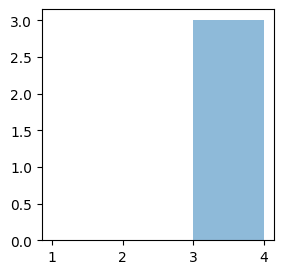

In [ ]:
# Z stack
num_z = []
for file_path in IMAGE_DIRS:

    # Open the TIFF file and extract the width and height of each page
    with tifffile.TiffFile(os.path.join(IMAGE_DIRECTORY_PATH, file_path)) as tiff:
        num_z.append(len(tiff.pages))

# Create a scatter plot
plt.figure(figsize=(3, 3))
plt.hist(num_z, bins=range(1, max(num_z) + 2), alpha=0.5)
plt.xticks(range(1, max(num_z) + 2))
plt.show()

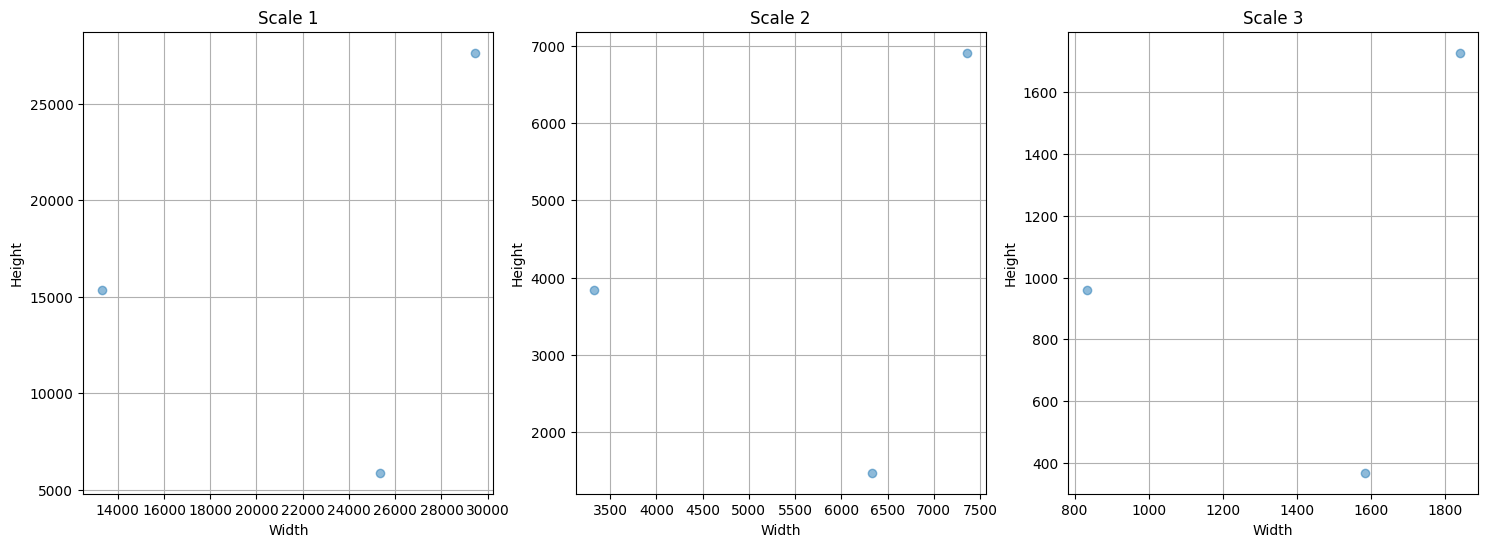

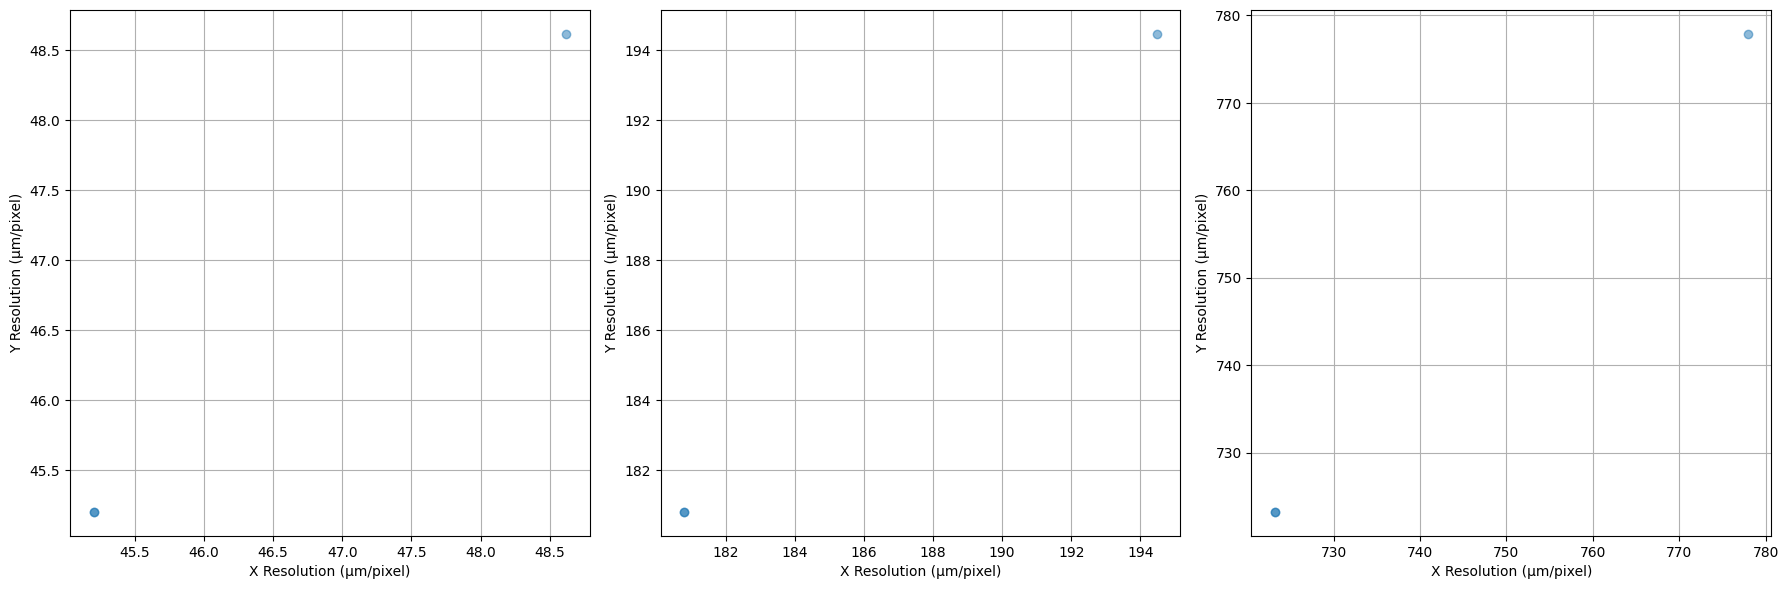

In [ ]:
# Lists to store the width and height of each page
widths = [[],[],[]]
heights = [[],[],[]]
x_resolution = [[],[],[]]
y_resolution = [[],[],[]]

for file_path in IMAGE_DIRS:

    # Open the TIFF file and extract the width and height of each page
    with tifffile.TiffFile(os.path.join(IMAGE_DIRECTORY_PATH, file_path)) as tiff:
        for i, page in enumerate(tiff.pages):
            w, h = page.shape[:2]
            x_res = page.tags['XResolution'].value[1] / page.tags['XResolution'].value[0] * 1e6  # Convert to micrometers per pixel
            y_res = page.tags['YResolution'].value[1] / page.tags['YResolution'].value[0] * 1e6  # Convert to micrometers per pixel
            widths[i].append(w)
            heights[i].append(h)
            x_resolution[i].append(x_res)
            y_resolution[i].append(y_res)

# Create scatter plot
fig1, axs1 = plt.subplots(1, 3, figsize=(18, 6))
fig2, axs2 = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    axs1[i].scatter(widths[i], heights[i], alpha=0.5)
    axs1[i].set_title(f'Scale {i+1}')
    axs1[i].set_xlabel('Width')
    axs1[i].set_ylabel('Height')
    axs1[i].grid(True)

    # TODO: Resolution looks not correct?...
    axs2[i].scatter(x_resolution[i], y_resolution[i], alpha=0.5)
    axs2[i].set_xlabel('X Resolution (?)')
    axs2[i].set_ylabel('Y Resolution (?)')
    axs2[i].grid(True)

plt.tight_layout()
plt.show()

In [33]:
df_image_info = pd.DataFrame(
    {
        "file_path": IMAGE_DIRS,
        "num_z": num_z,
        "width_1": widths[0],
        "height_1": heights[0],
        "x_resolution_1": x_resolution[0],
        "y_resolution_1": y_resolution[0],
        "width_2": widths[1],
        "height_2": heights[1],
        "x_resolution_2": x_resolution[1],
        "y_resolution_2": y_resolution[1],
        "width_3": widths[2],
        "height_3": heights[2],
        "x_resolution_3": x_resolution[2],
        "y_resolution_3": y_resolution[2]
    }
)
df_image_info

,file_path,num_z,width_1,height_1,x_resolution_1,y_resolution_1,width_2,height_2,x_resolution_2,y_resolution_2,width_3,height_3,x_resolution_3,y_resolution_3
0,000920ad0b612851f8e01bcc880d9b3d.tiff,3,13312,15360,45.201826,45.201826,3328,3840,180.806965,180.806965,832,960,723.229023,723.229023
1,0018ae58b01bdadc8e347995b69f99aa.tiff,3,25344,5888,48.618764,48.618764,6336,1472,194.474822,194.474822,1584,368,777.900452,777.900452
2,0005f7aaab2800f6170c399693a96917.tiff,3,29440,27648,45.201826,45.201826,7360,6912,180.806965,180.806965,1840,1728,723.229023,723.229023


#### Visualize image examples to inspect

In [ ]:
from PIL import Image

def read_tiff_page(file_path, page_number):
    with Image.open(file_path) as img:
        img.seek(page_number)
        img.show()

# Example usage
file_path = os.path.join(IMAGE_DIRECTORY_PATH, IMAGE_DIRS[0])
page_number = 0  # Page numbers are zero-indexed
read_tiff_page(file_path, page_number)